#### Importando as Bibliotecas

In [184]:
import pandas as pd
import string
import nltk
import pickle

nltk.download('stopwords')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Carregando os arquivos

In [185]:
df = pd.read_csv('../data/Data_Train.csv')

In [186]:
df

,ID,Message,SPAM
0,615317,Linda msg!,True
1,855344,To fazendo batida de kwui com coco,True
2,1007222,Esse dinheiro só vai sair para quem está com o...,True
3,811063,Isso msm Irmã.. nao lembrava dos nomes kkk,True
4,913944,Ai xara eu sujiro esse,True
...,...,...,...
1768,521420,Meu nome e alex sandro,True
1769,791210,Hum\nTenho ums aki\nN\nTenhos ums piso aki\nE ...,True
1770,1031770,Quem tem padrinho não morre pagão\nQuem tem pa...,True
1771,580122,ALUNO QUE PROCESSOU PROFESSOR POR TER TOMADO C...,True


In [187]:
df.shape

(1773, 3)

In [188]:
df['SPAM'].value_counts()

True     932
False    841
Name: SPAM, dtype: int64

#### Características:
- frequencia de palavras maiusculas
- frequencia de pontuacao
- frequencia de simbolos (emoji)
- quantidade de verbos
- quantidade de palavras
- quantidade de letras
- quantidade de simbolos com mais de 3 ocorrencias (ex: kkkk)


#### Verificando duplicados

In [189]:
# registros duplicados por ID

df[df['ID'].duplicated()]

,ID,Message,SPAM


In [190]:
# mensagens duplicadas

df[df['Message'].duplicated()]

,ID,Message,SPAM
170,473229,Volta já,False
199,545104,---\n---\nEnviado através do WhatsApp,False
320,443562,Ooi,True
372,746170,---\n---\nEnviado através do WhatsApp,False
581,265637,Ooi,True
916,281885,Teste,True
921,411908,"Galera, a próxima manifestação será um pouco d...",True
925,716654,Oii,True
1118,349264,Bom dia rio volta já,False
1229,932346,Bom dia grupo,True


In [191]:
df.drop_duplicates(subset=['Message'], inplace=True)

In [192]:
df.shape

(1758, 3)

### Normalização

In [193]:
def normalize_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords])

In [194]:
df['Message_Norm'] = df['Message'].apply(normalize_text)

### Tokenização

In [195]:
df['Message_Tokens'] = df['Message'].apply(nltk.tokenize.word_tokenize)

### Extração de Features

In [196]:
df['len'] = df['Message'].apply(len)

In [197]:
def freqUpper(text):
  uppers = [char for char in text if char.isupper()]
  return len(uppers)

In [198]:
df['freq_uppers'] = df['Message_Norm'].apply(freqUpper)

In [199]:
df

,ID,Message,SPAM,Message_Norm,Message_Tokens,len,freq_uppers
0,615317,Linda msg!,True,Linda msg,"[Linda, msg, !]",10,1
1,855344,To fazendo batida de kwui com coco,True,To fazendo batida kwui coco,"[To, fazendo, batida, de, kwui, com, coco]",34,1
2,1007222,Esse dinheiro só vai sair para quem está com o...,True,dinheiro vai sair nome lista dinheiro vai sair...,"[Esse, dinheiro, só, vai, sair, para, quem, es...",137,0
3,811063,Isso msm Irmã.. nao lembrava dos nomes kkk,True,msm Irmã nao lembrava nomes kkk,"[Isso, msm, Irmã, .., nao, lembrava, dos, nome...",42,1
4,913944,Ai xara eu sujiro esse,True,Ai xara sujiro,"[Ai, xara, eu, sujiro, esse]",22,1
...,...,...,...,...,...,...,...
1768,521420,Meu nome e alex sandro,True,nome alex sandro,"[Meu, nome, e, alex, sandro]",22,0
1769,791210,Hum\nTenho ums aki\nN\nTenhos ums piso aki\nE ...,True,Hum ums aki N Tenhos ums piso aki divisoria,"[Hum, Tenho, ums, aki, N, Tenhos, ums, piso, a...",51,3
1770,1031770,Quem tem padrinho não morre pagão\nQuem tem pa...,True,padrinho morre pagão padrinho morre pagão Graç...,"[Quem, tem, padrinho, não, morre, pagão, Quem,...",95,4
1771,580122,ALUNO QUE PROCESSOU PROFESSOR POR TER TOMADO C...,True,ALUNO PROCESSOU PROFESSOR TER TOMADO CELULAR S...,"[ALUNO, QUE, PROCESSOU, PROFESSOR, POR, TER, T...",2715,170


#### Top palavras em mensagens de SPAM

In [200]:
from collections import Counter

dict_freq_words = {}

for label in [True, False]:
  words = df[df['SPAM']==label]['Message_Norm'].apply(lambda x: [word.lower() for word in x.split()])
  count_words = Counter()
  for txt in words:
      count_words.update(txt)
  
  dict_freq_words[str(label)] = count_words.most_common(50)

In [201]:
dict_freq_words

{'True': [('vc', 160),
  ('q', 141),
  ('pra', 124),
  ('ta', 122),
  ('dia', 103),
  ('vai', 100),
  ('bom', 95),
  ('nao', 83),
  ('todos', 77),
  ('n', 68),
  ('agora', 66),
  ('kkk', 65),
  ('kkkk', 65),
  ('boa', 63),
  ('ai', 62),
  ('vou', 58),
  ('to', 55),
  ('vcs', 54),
  ('grupo', 51),
  ('deus', 51),
  ('fazer', 50),
  ('tudo', 50),
  ('mensagem', 47),
  ('rss', 47),
  ('pessoas', 45),
  ('oi', 45),
  ('pode', 43),
  ('aqui', 43),
  ('hoje', 42),
  ('cara', 41),
  ('fala', 40),
  ('nome', 39),
  ('vamos', 39),
  ('quero', 39),
  ('pq', 39),
  ('bem', 38),
  ('kkkkk', 38),
  ('rio', 37),
  ('favor', 36),
  ('sei', 36),
  ('kk', 36),
  ('ver', 35),
  ('😂😂😂', 35),
  ('porra', 34),
  ('nada', 33),
  ('🌑', 33),
  ('🌔', 33),
  ('gente', 32),
  ('5', 31),
  ('🌕', 31)],
 'False': [('rua', 201),
  ('dia', 170),
  ('bom', 114),
  ('q', 96),
  ('boa', 88),
  ('pra', 87),
  ('rio', 80),
  ('bairro', 77),
  ('aqui', 74),
  ('agora', 71),
  ('favor', 69),
  ('ajuda', 68),
  ('nome', 67),

In [202]:
dict_freq_words['True']

[('vc', 160),
 ('q', 141),
 ('pra', 124),
 ('ta', 122),
 ('dia', 103),
 ('vai', 100),
 ('bom', 95),
 ('nao', 83),
 ('todos', 77),
 ('n', 68),
 ('agora', 66),
 ('kkk', 65),
 ('kkkk', 65),
 ('boa', 63),
 ('ai', 62),
 ('vou', 58),
 ('to', 55),
 ('vcs', 54),
 ('grupo', 51),
 ('deus', 51),
 ('fazer', 50),
 ('tudo', 50),
 ('mensagem', 47),
 ('rss', 47),
 ('pessoas', 45),
 ('oi', 45),
 ('pode', 43),
 ('aqui', 43),
 ('hoje', 42),
 ('cara', 41),
 ('fala', 40),
 ('nome', 39),
 ('vamos', 39),
 ('quero', 39),
 ('pq', 39),
 ('bem', 38),
 ('kkkkk', 38),
 ('rio', 37),
 ('favor', 36),
 ('sei', 36),
 ('kk', 36),
 ('ver', 35),
 ('😂😂😂', 35),
 ('porra', 34),
 ('nada', 33),
 ('🌑', 33),
 ('🌔', 33),
 ('gente', 32),
 ('5', 31),
 ('🌕', 31)]

In [203]:
def get_most_commom_spam_words(message):
  values = []
  dict_top_spam_words = {}
  for word in message:
    values.extend([item[0] for item in dict_freq_words['True'] if word in item])
  for value in values:
    try:
      dict_top_spam_words[value] += 1
    except:
      dict_top_spam_words[value] = 1
  return dict_top_spam_words

In [204]:
df['dict_commom_spam'] = df['Message_Tokens'].apply(get_most_commom_spam_words)

#### Actions:
- Verificar quantidade de emojis
- Verificar quantidade de pontos (exclamação, final..)
- Pegar informações de POS

#### Utilizando o Spacy

In [205]:
import spacy
!python -m spacy download pt_core_news_sm
spc = spacy.load("pt_core_news_sm")

You should consider upgrading via the 'c:\Users\felip\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 13.0/13.0 MB 3.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


#### Salvando o resultado

In [206]:
with open('../model/spacy.pkl', 'wb') as posfile:
    pickle.dump(spc, posfile)

In [207]:
def get_pos(message):
  doc = spc(message)
  dict_pos = {}
  for token in doc:
    try:
      dict_pos[token.pos_] += 1
    except:
      dict_pos[token.pos_] = 1
  return dict_pos

In [208]:
df['dict_pos'] = df['Message'].apply(get_pos)

In [209]:
df

,ID,Message,SPAM,Message_Norm,Message_Tokens,len,freq_uppers,dict_commom_spam,dict_pos
0,615317,Linda msg!,True,Linda msg,"[Linda, msg, !]",10,1,{},"{'PROPN': 1, 'SPACE': 1, 'PUNCT': 1}"
1,855344,To fazendo batida de kwui com coco,True,To fazendo batida kwui coco,"[To, fazendo, batida, de, kwui, com, coco]",34,1,{},"{'NUM': 1, 'VERB': 1, 'NOUN': 3, 'ADP': 2}"
2,1007222,Esse dinheiro só vai sair para quem está com o...,True,dinheiro vai sair nome lista dinheiro vai sair...,"[Esse, dinheiro, só, vai, sair, para, quem, es...",137,0,"{'vai': 2, 'nome': 2}","{'DET': 4, 'NOUN': 6, 'ADV': 2, 'AUX': 4, 'VER..."
3,811063,Isso msm Irmã.. nao lembrava dos nomes kkk,True,msm Irmã nao lembrava nomes kkk,"[Isso, msm, Irmã, .., nao, lembrava, dos, nome...",42,1,"{'nao': 1, 'kkk': 1}","{'PRON': 1, 'PROPN': 2, 'PUNCT': 1, 'AUX': 1, ..."
4,913944,Ai xara eu sujiro esse,True,Ai xara sujiro,"[Ai, xara, eu, sujiro, esse]",22,1,{},"{'ADP': 1, 'NOUN': 1, 'PRON': 1, 'VERB': 1, 'D..."
...,...,...,...,...,...,...,...,...,...
1768,521420,Meu nome e alex sandro,True,nome alex sandro,"[Meu, nome, e, alex, sandro]",22,0,{'nome': 1},"{'DET': 1, 'NOUN': 1, 'CCONJ': 1, 'PROPN': 2}"
1769,791210,Hum\nTenho ums aki\nN\nTenhos ums piso aki\nE ...,True,Hum ums aki N Tenhos ums piso aki divisoria,"[Hum, Tenho, ums, aki, N, Tenhos, ums, piso, a...",51,3,{},"{'SCONJ': 1, 'SPACE': 4, 'VERB': 2, 'PRON': 1,..."
1770,1031770,Quem tem padrinho não morre pagão\nQuem tem pa...,True,padrinho morre pagão padrinho morre pagão Graç...,"[Quem, tem, padrinho, não, morre, pagão, Quem,...",95,4,{},"{'PRON': 2, 'AUX': 2, 'NOUN': 4, 'ADV': 4, 'VE..."
1771,580122,ALUNO QUE PROCESSOU PROFESSOR POR TER TOMADO C...,True,ALUNO PROCESSOU PROFESSOR TER TOMADO CELULAR S...,"[ALUNO, QUE, PROCESSOU, PROFESSOR, POR, TER, T...",2715,170,"{'q': 2, 'pessoas': 1, 'bem': 1, 'bom': 1}","{'NOUN': 119, 'PROPN': 35, 'ADP': 63, 'VERB': ..."


In [210]:
import json

In [211]:
df['dict_pos'] = df['dict_pos'].apply(lambda x: str(x).replace('\'','"').replace('None', '0').replace('True', '1').replace('False', '0'))

In [212]:
df_pos = df['dict_pos'].apply(json.loads).apply(pd.Series).fillna(0)

In [214]:
df_pos

,PROPN,SPACE,PUNCT,NUM,VERB,NOUN,ADP,DET,ADV,AUX,SCONJ,PRON,ADJ,CCONJ,X,INTJ,SYM
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5.0,8.0,4.0,2.0,6.0,4.0,4.0,2.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1769,0.0,4.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1770,2.0,3.0,0.0,0.0,2.0,4.0,2.0,0.0,4.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1771,35.0,15.0,75.0,1.0,56.0,119.0,63.0,64.0,21.0,9.0,14.0,14.0,21.0,18.0,1.0,0.0,0.0


In [215]:
df = pd.concat([df, df_pos],axis=1)

In [216]:
df

,ID,Message,SPAM,Message_Norm,Message_Tokens,len,freq_uppers,dict_commom_spam,dict_pos,PROPN,...,DET,ADV,AUX,SCONJ,PRON,ADJ,CCONJ,X,INTJ,SYM
0,615317,Linda msg!,True,Linda msg,"[Linda, msg, !]",10,1,{},"{""PROPN"": 1, ""SPACE"": 1, ""PUNCT"": 1}",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,855344,To fazendo batida de kwui com coco,True,To fazendo batida kwui coco,"[To, fazendo, batida, de, kwui, com, coco]",34,1,{},"{""NUM"": 1, ""VERB"": 1, ""NOUN"": 3, ""ADP"": 2}",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1007222,Esse dinheiro só vai sair para quem está com o...,True,dinheiro vai sair nome lista dinheiro vai sair...,"[Esse, dinheiro, só, vai, sair, para, quem, es...",137,0,"{'vai': 2, 'nome': 2}","{""DET"": 4, ""NOUN"": 6, ""ADV"": 2, ""AUX"": 4, ""VER...",0.0,...,4.0,2.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,811063,Isso msm Irmã.. nao lembrava dos nomes kkk,True,msm Irmã nao lembrava nomes kkk,"[Isso, msm, Irmã, .., nao, lembrava, dos, nome...",42,1,"{'nao': 1, 'kkk': 1}","{""PRON"": 1, ""PROPN"": 2, ""PUNCT"": 1, ""AUX"": 1, ...",2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,913944,Ai xara eu sujiro esse,True,Ai xara sujiro,"[Ai, xara, eu, sujiro, esse]",22,1,{},"{""ADP"": 1, ""NOUN"": 1, ""PRON"": 1, ""VERB"": 1, ""D...",0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,521420,Meu nome e alex sandro,True,nome alex sandro,"[Meu, nome, e, alex, sandro]",22,0,{'nome': 1},"{""DET"": 1, ""NOUN"": 1, ""CCONJ"": 1, ""PROPN"": 2}",2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1769,791210,Hum\nTenho ums aki\nN\nTenhos ums piso aki\nE ...,True,Hum ums aki N Tenhos ums piso aki divisoria,"[Hum, Tenho, ums, aki, N, Tenhos, ums, piso, a...",51,3,{},"{""SCONJ"": 1, ""SPACE"": 4, ""VERB"": 2, ""PRON"": 1,...",0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1770,1031770,Quem tem padrinho não morre pagão\nQuem tem pa...,True,padrinho morre pagão padrinho morre pagão Graç...,"[Quem, tem, padrinho, não, morre, pagão, Quem,...",95,4,{},"{""PRON"": 2, ""AUX"": 2, ""NOUN"": 4, ""ADV"": 4, ""VE...",2.0,...,0.0,4.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1771,580122,ALUNO QUE PROCESSOU PROFESSOR POR TER TOMADO C...,True,ALUNO PROCESSOU PROFESSOR TER TOMADO CELULAR S...,"[ALUNO, QUE, PROCESSOU, PROFESSOR, POR, TER, T...",2715,170,"{'q': 2, 'pessoas': 1, 'bem': 1, 'bom': 1}","{""NOUN"": 119, ""PROPN"": 35, ""ADP"": 63, ""VERB"": ...",35.0,...,64.0,21.0,9.0,14.0,14.0,21.0,18.0,1.0,0.0,0.0


### Transformando frequencia em porcentagem

In [217]:
df['len_tokens'] = df['Message_Tokens'].apply(len)

In [218]:
df

,ID,Message,SPAM,Message_Norm,Message_Tokens,len,freq_uppers,dict_commom_spam,dict_pos,PROPN,...,ADV,AUX,SCONJ,PRON,ADJ,CCONJ,X,INTJ,SYM,len_tokens
0,615317,Linda msg!,True,Linda msg,"[Linda, msg, !]",10,1,{},"{""PROPN"": 1, ""SPACE"": 1, ""PUNCT"": 1}",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,855344,To fazendo batida de kwui com coco,True,To fazendo batida kwui coco,"[To, fazendo, batida, de, kwui, com, coco]",34,1,{},"{""NUM"": 1, ""VERB"": 1, ""NOUN"": 3, ""ADP"": 2}",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,1007222,Esse dinheiro só vai sair para quem está com o...,True,dinheiro vai sair nome lista dinheiro vai sair...,"[Esse, dinheiro, só, vai, sair, para, quem, es...",137,0,"{'vai': 2, 'nome': 2}","{""DET"": 4, ""NOUN"": 6, ""ADV"": 2, ""AUX"": 4, ""VER...",0.0,...,2.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,36
3,811063,Isso msm Irmã.. nao lembrava dos nomes kkk,True,msm Irmã nao lembrava nomes kkk,"[Isso, msm, Irmã, .., nao, lembrava, dos, nome...",42,1,"{'nao': 1, 'kkk': 1}","{""PRON"": 1, ""PROPN"": 2, ""PUNCT"": 1, ""AUX"": 1, ...",2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9
4,913944,Ai xara eu sujiro esse,True,Ai xara sujiro,"[Ai, xara, eu, sujiro, esse]",22,1,{},"{""ADP"": 1, ""NOUN"": 1, ""PRON"": 1, ""VERB"": 1, ""D...",0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,521420,Meu nome e alex sandro,True,nome alex sandro,"[Meu, nome, e, alex, sandro]",22,0,{'nome': 1},"{""DET"": 1, ""NOUN"": 1, ""CCONJ"": 1, ""PROPN"": 2}",2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5
1769,791210,Hum\nTenho ums aki\nN\nTenhos ums piso aki\nE ...,True,Hum ums aki N Tenhos ums piso aki divisoria,"[Hum, Tenho, ums, aki, N, Tenhos, ums, piso, a...",51,3,{},"{""SCONJ"": 1, ""SPACE"": 4, ""VERB"": 2, ""PRON"": 1,...",0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,11
1770,1031770,Quem tem padrinho não morre pagão\nQuem tem pa...,True,padrinho morre pagão padrinho morre pagão Graç...,"[Quem, tem, padrinho, não, morre, pagão, Quem,...",95,4,{},"{""PRON"": 2, ""AUX"": 2, ""NOUN"": 4, ""ADV"": 4, ""VE...",2.0,...,4.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,18
1771,580122,ALUNO QUE PROCESSOU PROFESSOR POR TER TOMADO C...,True,ALUNO PROCESSOU PROFESSOR TER TOMADO CELULAR S...,"[ALUNO, QUE, PROCESSOU, PROFESSOR, POR, TER, T...",2715,170,"{'q': 2, 'pessoas': 1, 'bem': 1, 'bom': 1}","{""NOUN"": 119, ""PROPN"": 35, ""ADP"": 63, ""VERB"": ...",35.0,...,21.0,9.0,14.0,14.0,21.0,18.0,1.0,0.0,0.0,527


In [219]:
df.columns

Index(['ID', 'Message', 'SPAM', 'Message_Norm', 'Message_Tokens', 'len',
       'freq_uppers', 'dict_commom_spam', 'dict_pos', 'PROPN', 'SPACE',
       'PUNCT', 'NUM', 'VERB', 'NOUN', 'ADP', 'DET', 'ADV', 'AUX', 'SCONJ',
       'PRON', 'ADJ', 'CCONJ', 'X', 'INTJ', 'SYM', 'len_tokens'],
      dtype='object')

In [220]:
numeric_columns = ['freq_uppers', 'PROPN', 'SPACE', 'PUNCT', 'NUM', 'VERB',
       'NOUN', 'ADP', 'DET', 'ADV', 'AUX', 'SCONJ', 'PRON', 'ADJ', 'CCONJ',
       'X', 'INTJ', 'SYM']

In [221]:
with open('../model/numeric_columns.pkl', 'wb') as listfile:
    pickle.dump(numeric_columns, listfile)

In [222]:
for column in numeric_columns:
  df[column] = (df[column] / df['len_tokens']) * 100

In [223]:
df['len_common_spam_words'] = df['dict_commom_spam'].apply(lambda x: sum(x.values()))

In [224]:
df['pct_common_spam_words'] = (df['len_common_spam_words'] / df['len_tokens']) * 100

In [225]:
df

,ID,Message,SPAM,Message_Norm,Message_Tokens,len,freq_uppers,dict_commom_spam,dict_pos,PROPN,...,SCONJ,PRON,ADJ,CCONJ,X,INTJ,SYM,len_tokens,len_common_spam_words,pct_common_spam_words
0,615317,Linda msg!,True,Linda msg,"[Linda, msg, !]",10,33.333333,{},"{""PROPN"": 1, ""SPACE"": 1, ""PUNCT"": 1}",33.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3,0,0.000000
1,855344,To fazendo batida de kwui com coco,True,To fazendo batida kwui coco,"[To, fazendo, batida, de, kwui, com, coco]",34,14.285714,{},"{""NUM"": 1, ""VERB"": 1, ""NOUN"": 3, ""ADP"": 2}",0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7,0,0.000000
2,1007222,Esse dinheiro só vai sair para quem está com o...,True,dinheiro vai sair nome lista dinheiro vai sair...,"[Esse, dinheiro, só, vai, sair, para, quem, es...",137,0.000000,"{'vai': 2, 'nome': 2}","{""DET"": 4, ""NOUN"": 6, ""ADV"": 2, ""AUX"": 4, ""VER...",0.000000,...,5.555556,5.555556,0.000000,0.000000,0.000000,0.0,0.0,36,4,11.111111
3,811063,Isso msm Irmã.. nao lembrava dos nomes kkk,True,msm Irmã nao lembrava nomes kkk,"[Isso, msm, Irmã, .., nao, lembrava, dos, nome...",42,11.111111,"{'nao': 1, 'kkk': 1}","{""PRON"": 1, ""PROPN"": 2, ""PUNCT"": 1, ""AUX"": 1, ...",22.222222,...,0.000000,11.111111,0.000000,0.000000,0.000000,0.0,0.0,9,2,22.222222
4,913944,Ai xara eu sujiro esse,True,Ai xara sujiro,"[Ai, xara, eu, sujiro, esse]",22,20.000000,{},"{""ADP"": 1, ""NOUN"": 1, ""PRON"": 1, ""VERB"": 1, ""D...",0.000000,...,0.000000,20.000000,0.000000,0.000000,0.000000,0.0,0.0,5,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,521420,Meu nome e alex sandro,True,nome alex sandro,"[Meu, nome, e, alex, sandro]",22,0.000000,{'nome': 1},"{""DET"": 1, ""NOUN"": 1, ""CCONJ"": 1, ""PROPN"": 2}",40.000000,...,0.000000,0.000000,0.000000,20.000000,0.000000,0.0,0.0,5,1,20.000000
1769,791210,Hum\nTenho ums aki\nN\nTenhos ums piso aki\nE ...,True,Hum ums aki N Tenhos ums piso aki divisoria,"[Hum, Tenho, ums, aki, N, Tenhos, ums, piso, a...",51,27.272727,{},"{""SCONJ"": 1, ""SPACE"": 4, ""VERB"": 2, ""PRON"": 1,...",0.000000,...,9.090909,9.090909,9.090909,9.090909,0.000000,0.0,0.0,11,0,0.000000
1770,1031770,Quem tem padrinho não morre pagão\nQuem tem pa...,True,padrinho morre pagão padrinho morre pagão Graç...,"[Quem, tem, padrinho, não, morre, pagão, Quem,...",95,22.222222,{},"{""PRON"": 2, ""AUX"": 2, ""NOUN"": 4, ""ADV"": 4, ""VE...",11.111111,...,0.000000,11.111111,0.000000,0.000000,0.000000,0.0,0.0,18,0,0.000000
1771,580122,ALUNO QUE PROCESSOU PROFESSOR POR TER TOMADO C...,True,ALUNO PROCESSOU PROFESSOR TER TOMADO CELULAR S...,"[ALUNO, QUE, PROCESSOU, PROFESSOR, POR, TER, T...",2715,32.258065,"{'q': 2, 'pessoas': 1, 'bem': 1, 'bom': 1}","{""NOUN"": 119, ""PROPN"": 35, ""ADP"": 63, ""VERB"": ...",6.641366,...,2.656546,2.656546,3.984820,3.415560,0.189753,0.0,0.0,527,5,0.948767


### Model

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [228]:
df.columns

Index(['ID', 'Message', 'SPAM', 'Message_Norm', 'Message_Tokens', 'len',
       'freq_uppers', 'dict_commom_spam', 'dict_pos', 'PROPN', 'SPACE',
       'PUNCT', 'NUM', 'VERB', 'NOUN', 'ADP', 'DET', 'ADV', 'AUX', 'SCONJ',
       'PRON', 'ADJ', 'CCONJ', 'X', 'INTJ', 'SYM', 'len_tokens',
       'len_common_spam_words', 'pct_common_spam_words'],
      dtype='object')

In [229]:
df['SPAM'] = df['SPAM'].map({True:1, False:0})

In [230]:
X = df[['len', 'freq_uppers', 'PROPN', 'SPACE', 'PUNCT', 'NUM', 'VERB',
       'NOUN', 'ADP', 'DET', 'ADV', 'AUX', 'SCONJ', 'PRON', 'ADJ', 'CCONJ',
       'X', 'INTJ', 'SYM', 'len_tokens', 'pct_common_spam_words']]

Y = df['SPAM']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42, stratify=Y)

In [231]:
used_columns = X.columns
with open('../model/used_columns.pkl', 'wb') as listfile:
    pickle.dump(used_columns, listfile)

In [232]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [233]:
def evaluate_model(yReal, yHat):
  acuracia = metrics.accuracy_score(yReal, yHat)
  precisao = metrics.precision_score(yReal, yHat)
  recall = metrics.recall_score(yReal, yHat)
  f1_score = metrics.f1_score(yReal, yHat)

  print('Accuracy: ', acuracia * 100) 
  print('Precision: ', precisao * 100) 
  print('Recall: ', recall * 100)
  print('F1-Score: ', f1_score * 100)
  print('---------------------\n') 

  cmf = metrics.confusion_matrix(yReal, yHat)
  sns.heatmap(pd.DataFrame(cmf), annot=True, fmt='g')
  plt.xlabel('P R E D I C T')
  plt.ylabel('R E A L')
  plt.show()


  print(metrics.classification_report(yReal, yHat))

  ROC_AUC = metrics.roc_auc_score(yReal, yHat)
  print('ROC AUC : {:.4f}'.format(ROC_AUC))

### Regressão Logistica

In [234]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [235]:
y_pred = lr.predict(x_test_scaled)

Accuracy:  74.43181818181817
Precision:  77.734375
Recall:  71.84115523465704
F1-Score:  74.671669793621
---------------------



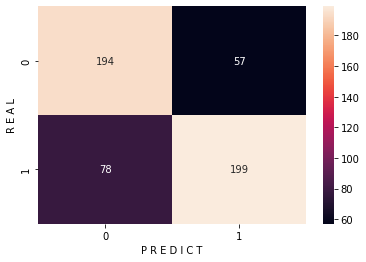

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       251
           1       0.78      0.72      0.75       277

    accuracy                           0.74       528
   macro avg       0.75      0.75      0.74       528
weighted avg       0.75      0.74      0.74       528

ROC AUC : 0.7457


In [236]:
evaluate_model(y_test, y_pred)

### KNN

In [237]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


In [238]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn, param_grid,cv=10)
knn_cv.fit(x_train_scaled, y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7439024390243902
Best Parameters: {'n_neighbors': 19}


In [239]:
knn = KNeighborsClassifier(19)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=19)

Accuracy:  73.48484848484848
Precision:  84.77157360406092
Recall:  60.28880866425993
F1-Score:  70.46413502109705
---------------------



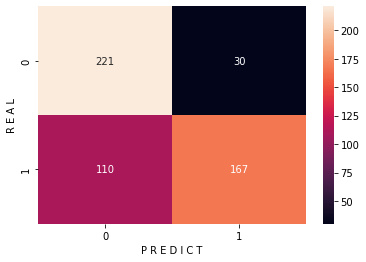

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       251
           1       0.85      0.60      0.70       277

    accuracy                           0.73       528
   macro avg       0.76      0.74      0.73       528
weighted avg       0.76      0.73      0.73       528

ROC AUC : 0.7417


In [240]:
y_pred = knn.predict(x_test_scaled)
evaluate_model(y_test, y_pred)


### Árvore de Decisão

In [241]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [242]:
dt = DecisionTreeClassifier(random_state=42)


In [243]:
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy:  70.83333333333334
Precision:  71.57894736842105
Recall:  73.6462093862816
F1-Score:  72.59786476868328
---------------------



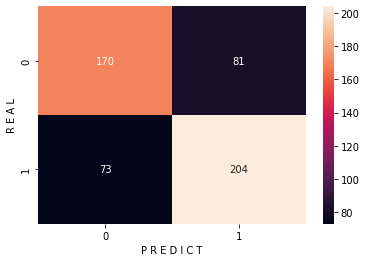

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       251
           1       0.72      0.74      0.73       277

    accuracy                           0.71       528
   macro avg       0.71      0.71      0.71       528
weighted avg       0.71      0.71      0.71       528

ROC AUC : 0.7069


In [244]:
y_pred = dt.predict(x_test_scaled)
evaluate_model(y_test, y_pred)


### Tuning Decision Tree

In [245]:
dt = DecisionTreeClassifier(random_state=42)


params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=10, verbose=1, scoring = "accuracy")

grid_search.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

Accuracy:  75.75757575757575
Precision:  75.77854671280276
Recall:  79.06137184115524
F1-Score:  77.3851590106007
---------------------



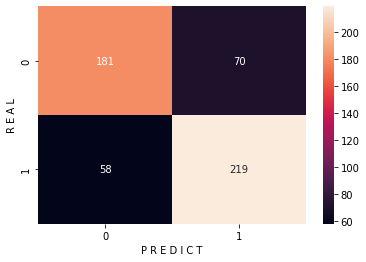

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       251
           1       0.76      0.79      0.77       277

    accuracy                           0.76       528
   macro avg       0.76      0.76      0.76       528
weighted avg       0.76      0.76      0.76       528

ROC AUC : 0.7559


In [246]:
y_pred = grid_search.predict(x_test_scaled)
evaluate_model(y_test, y_pred)


In [247]:
best_tree = grid_search.best_estimator_

In [248]:
best_tree

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

### Final Model

In [249]:
final_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [250]:
final_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

Accuracy:  75.75757575757575
Precision:  75.77854671280276
Recall:  79.06137184115524
F1-Score:  77.3851590106007
---------------------



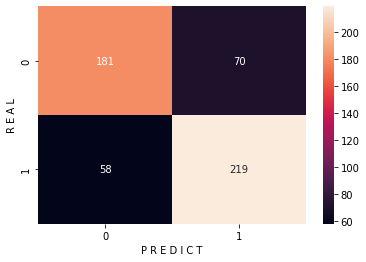

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       251
           1       0.76      0.79      0.77       277

    accuracy                           0.76       528
   macro avg       0.76      0.76      0.76       528
weighted avg       0.76      0.76      0.76       528

ROC AUC : 0.7559


In [251]:
y_pred = final_model.predict(x_test_scaled)
evaluate_model(y_test, y_pred)

### Salvando os modelos e transformações

In [252]:

import pickle

with open("../model/std_transform.pkl", "wb") as stdfile:
    pickle.dump(scaler, stdfile)

with open('../model/spam_tree.pkl', 'wb') as modelfile:
    pickle.dump(final_model, modelfile)

with open('../model/commom_spam_words.pkl', 'wb') as wordfile:
    pickle.dump(dict_freq_words['True'], wordfile)


### Avaliação do modelo utilizando as métricas Precision, Recall e F1 Score

In [253]:
def evaluate_model2(yReal, yHat):
  precisao = metrics.precision_score(yReal, yHat)
  recall = metrics.recall_score(yReal, yHat)
  f1_score = metrics.f1_score(yReal, yHat)

  print('Precision:', round(precisao * 100),"%")
  print('Recall:', round(recall * 100),"%")
  print('F1 score:', round(f1_score * 100),"%") 
  print('---------------------\n') 
 

In [254]:
y_pred = final_model.predict(x_test_scaled)
evaluate_model2(y_test, y_pred)

Precision: 76 %
Recall: 79 %
F1 score: 77 %
---------------------

